# Analisis exploratorio de datos: Encuesta Nacional de Inclusion Financiera (ENIF)

## Presenta: Luis Carlos Rodriguez Pacheco

## luis.pacheco@train.ia.center

## Ciencia de datos Bosch modulo 1: Centro de Inteligencia Artificial (IA-CENTER)





## Indice de Contenido:

### 1. Introducción

### 2. Metodología
    2.1. Importación de datos
    2.2. Análisis exploratorio
    2.3. Limpieza de datos
    2.4. Preparación de datos


### 3. Visualizacion

### 4. Dashboard y conclusiones finales

### 5. Bibliografía consultada





## 1. Introducción 

La inclusión financiera es un concepto multifactorial, que se define como el acceso y uso
de servicios financieros formales bajo una regulación apropiada que garantice esquemas
de protección al consumidor y promueva la educación financiera para mejorar la
capacidad financiera de todos los segmentos de la población (CNBV, 2020). De esta
forma, la inclusión financiera va más allá de la penetración del crédito o el ahorro: implica
democratizar el acceso a servicios financieros de calidad y en las condiciones adecuadas
para que la población pueda beneficiarse de participar en el sistema financiero.

Los beneficios que la inclusión financiera puede tener en una sociedad es un tema que
ha generado interés en la literatura, la cual ha documentado efectos tanto a nivel de
hogares y empresas como a nivel macroeconómico. Diversos estudios a nivel agregado
han encontrado una relación positiva entre una mayor inclusión financiera y el
crecimiento y desarrollo económicos (Barajas, et al., 2020; Demirguc-Kunt, et al., 2017; Cull
et al., 2014; Beck et al., 2009). Además, investigaciones recientes muestran que el impacto
positivo de un sistema financiero de mayor tamaño se incrementa en aquellos países con
mayores niveles de inclusión financiera (Svirydzenka, 2016). De forma análoga, la inclusión
financiera ha probado ser una herramienta esencial para combatir la desigualdad y la
pobreza (Cihak & Sahay, 2020; Loukaianova & Yang, 2018). Además, sus beneficios no se
limitan únicamente a la población usuaria, ya que también contribuye a conformar un
sistema financiero más estable (Nguyen & Du, 2022; Banna & Alam, 2021; Ahamed &
Mallick, 2019), al ofrecer a las instituciones financieras una fuente de fondeo estable a
través de la captación, y reducir la toma de riesgos de las instituciones. 

La importancia de promover la educación financiera entre la población radica en que
la evidencia académica ha mostrado que bajos niveles de educación financiera podrían
detener el crecimiento de la inclusión financiera (Atkinson & Messy, 2013b). Otras
investigaciones han mostrado consistentemente que obtener estas capacidades
económico-financieras es esencial para evitar cometer errores financieros, como pueden
ser ahorrar en instrumentos no adecuados, no contar con un plan de retiro, tomar riesgos
excesivos al invertir, recurrir a fuentes de financiamiento costosas, realizar un manejo
inadecuado de sus deudas o ser víctima de fraudes o estafas (Lusardi & Mitchell, 2014).
Además, la educación financiera tiene un impacto significativo en el desarrollo
económico, ya que, se ha encontrado que mejoras en las competencias económicofinancieras contribuyen a una menor desigualdad de los ingresos (Oliver-Márquez, et al
2021, Lusardi, et al.; 2017, Lo Prete, 2013) y reduce los niveles de pobreza (Askar, et al., 2020). 

Considerando la importancia que tienen la inclusión y la educación financiera como
medios complementarios no solo para fomentar un mayor crecimiento económico sino
también para mejorar la calidad de vida de la población mexicana, el Gobierno de México ha establecido la Política Nacional de Inclusión Financiera (PNIF), cuyo objetivo
primordial es impulsar la inclusión y las competencias económico-financieras, así como
la protección a la población usuaria de productos financieros en México. Asimismo, la
PNIF Incluye la Estrategia Nacional del Educación Financiera (ENEF), cuyo objetivo es
guiar los esfuerzos del país para fomentar el bienestar financiero de la población.
Evaluar y dar seguimiento a los avances de esta política sería imposible sin fuentes de
datos adecuadas y robustas. Con este fin, la Comisión Nacional Bancaria y de Valores
(CNBV), en colaboración con el Instituto Nacional de Estadística y Geografía (INEGI),
realizan la Encuesta Nacional de Inclusión Financiera (ENIF). Esta encuesta tiene como
objetivo generar información estadística e indicadores oficiales a nivel nacional y regional
que permitan a las autoridades financieras hacer diagnósticos, diseñar políticas públicas
y establecer metas en materia de inclusión y educación financieras; asimismo, incorporar
cambios y actualizaciones requeridas para dar atención a nuevos requerimientos de
información y consideraciones en la PNIF.





## 2. Metodología

### 2.1 Importación de datos

Del sitio: https://www.inegi.org.mx/programas/enif/2021/#datos_abiertos se hizo la descarga del conjunto de datos comprimidos. Despues de un proceso de descompresión se obtuvieron los conjuntos de datos: tmodulo y tsdem. Ambos se almacenaron en sus correspondientes carpetas.

Importante:

El presente estudio se baso en dos conjuntos de datos: tsdem y tmodulo. 

tmodulo: Información de las secciones del módulo. Informacion del hogar en si

tsdem: Información de residentes del hogar. Información propia de las personas dentro del hogar.

La forma en que los datos se organizan es:

Hay un conjunto de datos principal (tmodulo, tsdem), cada feature esta asociada con una clave y un valor, la información de los valores se encuentra en "catalogos" alojados dentro del mismo directorio. El significado de cada pregunta se encuentra dentro de diccionario de datos. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Creando una funcion la cual recibe si es tipo tmodulo o tsdem, además del año que se esta investigando. Despliega un diccionario con los datasets: principales, diccionarios y de catalogos (siendo este ultimo, otro diccionario). De tal modo que se importan todos los .csv relacionados en un solo diccionario.

In [3]:
# Importando conjuntos de datos principales:
def leer_conjunto_principal(archivo,year):
    mainpath = f"conjunto_de_datos_{archivo}_enif_{year}"
    df1 = pd.read_csv(f"{mainpath}/conjunto_de_datos/conjunto_de_datos_{archivo}_enif_{year}.csv")
    dfdict = pd.read_csv(f"{mainpath}/diccionario_de_datos/diccionario_datos_{archivo}_enif_{year}.csv")
    catalogos = {}
    contenidocatalogos = os.listdir(f"conjunto_de_datos_{archivo}_enif_{year}/catalogos")
    
    for catalogo in contenidocatalogos:
        catalogos[catalogo.replace(".csv","")] = pd.read_csv(f"conjunto_de_datos_{archivo}_enif_{year}/catalogos/{catalogo}",  encoding="ISO-8859-1")

    conjuntos = {"df":df1, "diccionario":dfdict, "catalogos":catalogos}

    return conjuntos
    

importando datos de tsdem

In [4]:
# tsdem
tsdem = leer_conjunto_principal("tsdem", 2021)

importando datos de tmodulo

In [5]:
tmodulo = leer_conjunto_principal("tmodulo", 2021)

### 2.2 Limpieza de datos

En tsdem y tmodulo:
Columna Edad en tmodulo y tsdem

In [6]:
tsdem["catalogos"]["edad"]

,cve,descrip
0,0,Menos de un año
1,01 96,Años cumplidos
2,97,97 años y más
3,98,Edad no especificada en personas de 18 años y más
4,99,Otra edad no especificada


In [7]:
tmodulo["catalogos"]["edad"]

,cve,descrip
0,0,Menos de un año
1,01...96,Años cumplidos
2,97,97 años y más
3,98,Edad no especificada en personas de 18 años y más
4,99,Otra edad no especificada


En ambos, se observa que la columna años cumplidos es un rango, mismo que no tiene sentido, ya que esos años cumplidos corresponden justo al valor de la columna cve

In [8]:
#Eliminando la fila 1 del dataset edad, del subdirectorio catalogos del directorio tsdem
tsdem["catalogos"]["edad"] = tsdem["catalogos"]["edad"].drop(1, axis=0)


In [9]:
#Eliminando la fila 1 del dataset edad, del subdirectorio catalogos del directorio tmodulo
tmodulo["catalogos"]["edad"] = tmodulo["catalogos"]["edad"].drop(1, axis=0)

En tmodulo ....

Analizando el p12_4

In [10]:
tmodulo["diccionario"][tmodulo["diccionario"]["nemónico"] == "p12_4"]

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves,Unnamed: 6,Unnamed: 7,Unnamed: 8
359,Pregunta P12.4 ¿Cuántos meses le tomó reponers...,2,C,p12_4,p12_4,01...88,NaN,NaN,NaN


In [11]:
tmodulo["catalogos"]["p12_4"]

,cve,descrip
0,01...87,Meses
1,88,Todavía no se recupera o sigue endeudada(o)


Se observa la misma situacion en el registro 0, hay un rango ilegible de meses, que ademas, el valor actual corresponde al mismo valor en meses, por lo que no es necesario indexarse. 

In [12]:
#eliminando el registro Meses
tmodulo["catalogos"]["p12_4"] = tmodulo["catalogos"]["p12_4"].drop(0, axis=0)

Analizando el p3_8a 

In [13]:
tmodulo["diccionario"][tmodulo["diccionario"]["nemónico"] == "p3_8a"]["nombre_campo"]

12    Pregunta P3.8A ¿Cuánto gana o recibe usted por...
Name: nombre_campo, dtype: object

In [14]:
tmodulo["catalogos"]["p3_8a"]

,cve,descrip
0,0,No recibe ingresos
1,00001...97999,Ingresos
2,98000,$98 000 y más
3,99888,No responde


Se observa la misma situacion, en este caso con los ingresos. Siendo el numero dado un numero actual, real.


In [15]:
tmodulo["catalogos"]["p3_8a"] = tmodulo["catalogos"]["p3_8a"].drop(1, axis=0)

Removiendo p10_9_2

In [16]:
tmodulo["catalogos"]["p10_9_2"]

,cve,descrip
0,00...59,Minutos
1,99,No sabe


In [17]:
tmodulo["catalogos"]["p10_9_2"] = tmodulo["catalogos"]["p10_9_2"].drop(0, axis=0)

Removiendo p5_12

In [18]:
tmodulo["catalogos"]["p5_12"]

,cve,descrip
0,0,No la utiliza
1,01...87,Número de veces
2,88,Menos de una vez al mes


In [19]:
tmodulo["catalogos"]["p10_9_2"] = tmodulo["catalogos"]["p10_9_2"].drop(1, axis=0)

Con el valor p10_6_1

In [20]:
tmodulo["catalogos"]["p10_6_1"]

,cve,descrip
0,00...23,Horas
1,99,No sabe


In [21]:
tmodulo["catalogos"]["p10_6_1"] = tmodulo["catalogos"]["p10_6_1"].drop(0, axis=0)

Con el valor p10_9_1

In [22]:
tmodulo["catalogos"]["p10_9_1"]

,cve,descrip
0,00...23,Horas
1,99,No sabe


In [23]:
tmodulo["catalogos"]["p10_9_1"] = tmodulo["catalogos"]["p10_9_1"].drop(0, axis=0)

Con el valor p10_3_1

In [24]:
tmodulo["catalogos"]["p10_3_1"]

,cve,descrip
0,00...23,Horas
1,99,No sabe


In [25]:
tmodulo["catalogos"]["p10_3_1"] = tmodulo["catalogos"]["p10_3_1"].drop(0, axis=0)

p10_6_2

In [26]:
tmodulo["catalogos"]["p10_6_2"]

,cve,descrip
0,00...59,Minutos
1,99,No sabe


In [27]:
tmodulo["catalogos"]["p10_6_2"] = tmodulo["catalogos"]["p10_6_2"].drop(0, axis=0)

p6_9

In [28]:
tmodulo["catalogos"]["p6_9"]

,cve,descrip
0,0,No la utiliza
1,01...87,Número de veces
2,88,Menos de una vez al mes


In [29]:
tmodulo["catalogos"]["p6_9"] = tmodulo["catalogos"]["p6_9"].drop(1, axis=0)

p10_3_2

In [30]:
tmodulo["catalogos"]["p10_3_2"]

,cve,descrip
0,00...59,Minutos
1,99,No sabe


In [31]:
tmodulo["catalogos"]["p10_3_2"] = tmodulo["catalogos"]["p10_3_2"].drop(0, axis=0)

Reemplazando valores numericos por categoricos ... 

Analizando cada valor

In [32]:
tsdem["diccionario"]

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves
0,Número de folio,5,C,folio,NaN,00001...13352
1,Número de vivienda seleccionada,2,C,viv_sel,NaN,01...25
2,Número de hogar en la vivienda,1,C,hogar,NaN,1...5
3,Número de renglón,2,C,n_ren,NaN,01...30
4,Pregunta P2.3 ¿Qué es (NOMBRE) de la (del) jef...,1,C,p2_3,p2_3,1...6
5,Pregunta SEXO (NOMBRE) es hombre (NOMBRE) es m...,1,C,sexo,sexo,"1,2"
6,Pregunta EDAD ¿Cuántos años cumplidos tiene (N...,2,C,edad,edad,00...99
7,Pregunta NIV ¿Hasta qué año o grado aprobó (NO...,2,C,niv,niv,"00...09,99"
8,Pregunta GRA ¿Hasta qué año o grado aprobó (NO...,1,C,gra,NaN,0...9
9,Tamaño de localidad,1,C,tloc,tloc,1...4


Analizando el diccionario, se pueden observar varias variables del tipo categorico, haciendo una recopilacion de las mismas, y basandose en "catalogos", ya que se haran cambios de variables 

Haciendo la conversion de los valores de df, a valores proporcionados por "catalogos":

In [33]:
import warnings

def cambiar_valores(archivo): #se recibe el diccionario general
    """
    Esta funcion esta diseñada para recibir un diccionario con las llaves df, diccionario y catalogos.
    Se va a encargar de hacer una trasnformacion de valores dentro del DF por valores descriptores en 
    otro dataframe ubicado en catalogos
    """
    #Se recorren los valores de catalogo en diccionario, esto para ver que archivos estan disponibles
    for indice in archivo["diccionario"]["catálogo"][pd.notnull(archivo["diccionario"]["catálogo"])]:
        #Se accede a cada uno de los catalogos y se recorren los valores CVE 
        for cve in archivo["catalogos"][indice]["cve"]:
            #Se filtran en el DF los valores del CVE recorrido
            #Se hace la asignacion a cada valor filtrado del descrip ubicado en catalogos
            archivo["df"][indice.upper()][archivo["df"][indice.upper()] == cve] = archivo["catalogos"][indice]["descrip"][archivo["catalogos"][indice]["cve"] == cve].values[0]
 

In [34]:
warnings.filterwarnings("ignore")

cambiar_valores(tsdem)
cambiar_valores(tmodulo)

In [35]:
tsdem["df"].sample(5) # Se tienen valores tipo objeto

,FOLIO,VIV_SEL,HOGAR,N_REN,P2_3,SEXO,EDAD,NIV,GRA,TLOC,REGION,EST_DIS,UPM_DIS,FAC_HOG
22216,6336,1,1,1,Jefa(e),Hombre,46,Preparatoria o bachillerato,3.0,Menor de 2 500 habitantes,"Centro Sur y Oriente (Estado de México, Hidalg...",95,1020,7714
45509,12925,1,1,2,Esposa(o) o compañera(o),Mujer,50,NaN,NaN,2 500 a 14 999 habitantes,"Sur (Campeche, Chiapas, Guerrero, Quintana Roo...",222,1975,2338
11753,3390,5,1,4,Hija(o),Hombre,21,NaN,NaN,100 000 y más habitantes,Ciudad de México (Ciudad de México),53,548,3016
24124,6850,3,1,4,Otro parentesco,Hombre,14,NaN,NaN,100 000 y más habitantes,"Centro Sur y Oriente (Estado de México, Hidalg...",113,1084,2217
26791,7640,2,1,5,Hija(o),Hombre,16,NaN,NaN,100 000 y más habitantes,"Noreste (Coahuila, Nuevo León, San Luis Potosí...",131,1197,2410


In [36]:
tmodulo["df"].sample(5)

,FOLIO,VIV_SEL,HOGAR,N_REN,P3_1_1,P3_1_2,P3_2,P3_3,P3_4,P3_5,...,P14_3_3,P14_4_3,P14_2_4,TLOC,REGION,SEXO,EDAD,EST_DIS,UPM_DIS,FAC_ELE
3077,3026,5,1,1,Secundaria,3,Está casada(o),No,No,Trabajó por lo menos una hora,...,NaN,NaN,No,100 000 y más habitantes,"Noroeste (Baja California, Baja California Sur...",Hombre,48,50,489,4285
10400,10237,3,1,2,Preparatoria o bachillerato,3,Está casada(o),No,No,Trabajó por lo menos una hora,...,NaN,NaN,No,100 000 y más habitantes,"Noroeste (Baja California, Baja California Sur...",Mujer,42,179,1573,8194
5151,5081,14,1,2,Secundaria,3,Está casada(o),No,No,Se dedica a los quehaceres del hogar o a cuida...,...,NaN,NaN,No,Menor de 2 500 habitantes,"Sur (Campeche, Chiapas, Guerrero, Quintana Roo...",Mujer,49,74,847,9541
5036,4968,5,1,1,Licenciatura o ingeniería (profesional),5,Vive con su pareja en unión libre,No,No,Trabajó por lo menos una hora,...,Crédito de una institución financiera,Debe pedir permiso a alguien,No,100 000 y más habitantes,"Sur (Campeche, Chiapas, Guerrero, Quintana Roo...",Hombre,35,76,840,4591
6126,6044,4,1,2,Preparatoria o bachillerato,3,Está casada(o),No,No,Trabajó por lo menos una hora,...,NaN,NaN,No,100 000 y más habitantes,"Centro Sur y Oriente (Estado de México, Hidalg...",Hombre,46,97,962,26360


Como siguiente paso, se procede a hacer el cambio al tipo de variable categorico dentro del mismo.

In [37]:
def categorico(archivo): #se recibe el diccionario general
    """
    Esta funcion esta diseñada para recibir un diccionario con las llaves df, diccionario y catalogos.
    Se funcion es hacer un cambio de variables a tipo categoricos, basado en un indice de catalogos
    """
    # Se hace un recorrido de los valores de los catalogos, y convertir cada uno a categorico en DF
    for indice in archivo["diccionario"]["catálogo"][pd.notnull(archivo["diccionario"]["catálogo"])]:
        if indice not in ["p3_8a", 'edad']:
            archivo["df"][indice.upper()] = archivo["df"][indice.upper()].astype("category")
        

In [38]:
#Haciendo los cambios a categoricos

categorico(tsdem)
categorico(tmodulo)

Analizando los cambios:

In [39]:
tsdem["df"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47045 entries, 0 to 47044
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   FOLIO    47045 non-null  int64   
 1   VIV_SEL  47045 non-null  int64   
 2   HOGAR    47045 non-null  int64   
 3   N_REN    47045 non-null  int64   
 4   P2_3     47045 non-null  category
 5   SEXO     47045 non-null  category
 6   EDAD     47045 non-null  int64   
 7   NIV      13561 non-null  category
 8   GRA      13561 non-null  float64 
 9   TLOC     47045 non-null  category
 10  REGION   47045 non-null  category
 11  EST_DIS  47045 non-null  int64   
 12  UPM_DIS  47045 non-null  int64   
 13  FAC_HOG  47045 non-null  int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 3.5 MB


In [40]:
tmodulo["df"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13554 entries, 0 to 13553
Columns: 382 entries, FOLIO to FAC_ELE
dtypes: category(354), float64(19), int64(9)
memory usage: 7.5 MB


Acomodando rangos de ingresos

In [41]:
indice = "p3_8a"

In [42]:
tmodulo["diccionario"][tmodulo["diccionario"]["nemónico"] == indice]

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves,Unnamed: 6,Unnamed: 7,Unnamed: 8
12,Pregunta P3.8A ¿Cuánto gana o recibe usted por...,5,C,p3_8a,p3_8a,"00000...98000,99888",NaN,NaN,NaN


Se observa que el indice p3_8a engloba a los ingresos

In [43]:
tmodulo["catalogos"][indice]

,cve,descrip
0,0,No recibe ingresos
2,98000,$98 000 y más
3,99888,No responde


Ingresos de 0 a 98000 

El INEGI toma en cuenta la siguiente clasificacion

Pesos mexicanos mensuales

![Alt text](image.png)

In [44]:
def clasificador_ingresos(archivo, indice):
    clase_baja_baja = 5400 #5400 a 8900
    clase_baja_alta = 8900 #8900 a 12300
    clase_media_baja = 12300 #12300 a 19900
    clase_media_alta = 19900 #19900 a 27800
    clase_alta_baja = 27800 #27800 a 51100
    clase_alta_alta = 51100 #mas de 51100
    # Definir los límites de las categorías
    bins = [0, clase_baja_baja, clase_baja_alta, clase_media_baja, clase_media_alta, clase_alta_baja, clase_alta_alta, 98000]

    # Definir los nombres de las categorías
    labels = ['clase_baja_absoluta', 'clase_baja_baja', 'clase_baja_alta', 'clase_media_baja', 'clase_media_alta', 'clase_alta_baja', 'clase_alta_alta']
    archivo["df"][f"{indice.upper()}_cat"] = pd.cut(archivo["df"][indice.upper()], bins=bins, labels=labels)


In [45]:
clasificador_ingresos(tmodulo, "p3_8a")

In [46]:
tmodulo["df"]["P3_8A_cat"]

0                        NaN
1        clase_baja_absoluta
2        clase_baja_absoluta
3                        NaN
4                        NaN
                ...         
13549                    NaN
13550    clase_baja_absoluta
13551                    NaN
13552    clase_baja_absoluta
13553                    NaN
Name: P3_8A_cat, Length: 13554, dtype: category
Categories (7, object): ['clase_baja_absoluta' < 'clase_baja_baja' < 'clase_baja_alta' < 'clase_media_baja' < 'clase_media_alta' < 'clase_alta_baja' < 'clase_alta_alta']

Creando rangos de edad

In [47]:
tmodulo["catalogos"]["edad"]

,cve,descrip
0,0,Menos de un año
2,97,97 años y más
3,98,Edad no especificada en personas de 18 años y más
4,99,Otra edad no especificada


In [48]:
archivo = tmodulo
indice = "edad"


adulto_joven = 18 #5400 a 8900
adulto = 40 #8900 a 12300
adulto_mayor = 60 #12300 a 19900

# Definir los límites de las categorías
bins = [0, adulto_joven, adulto, adulto_mayor, 97]

# Definir los nombres de las categorías
labels = ['adolescencia', 'adulto_joven', 'adulto', 'adulto_mayor']
archivo["df"][f"{indice.upper()}_cat"] = pd.cut(archivo["df"][indice.upper()], bins=bins, labels=labels)


elimniando el texto entre parentesis REGION tsdem

In [49]:
tsdem['df']['REGION'].replace("Noroeste (Baja California, Baja California Sur, Chihuahua, Durango, Sinaloa, Sonora)", "Noroeste", inplace=True)

tsdem['df']['REGION'].replace("Noreste (Coahuila, Nuevo León, San Luis Potosí, Tamaulipas)", "Noreste", inplace=True)

tsdem['df']['REGION'].replace("Occidente y Bajío  (Aguascalientes, Guanajuato, Jalisco, Michoacán, Nayarit, Querétaro, Zacatecas, Colima)", "Occidente y Bajío", inplace=True)

tsdem['df']['REGION'].replace("Ciudad de México (Ciudad de México)", "Ciudad de México", inplace=True)

tsdem['df']['REGION'].replace("Centro Sur y Oriente (Estado de México, Hidalgo, Morelos, Puebla, Tlaxcala, Veracruz)", "Centro Sur y Oriente", inplace=True)

tsdem['df']['REGION'].replace("Sur (Campeche, Chiapas, Guerrero, Quintana Roo, Tabasco, Yucatán, Oaxaca)", "Sur", inplace=True)

In [50]:
tsdem['df']['REGION']

0        Occidente y Bajío
1        Occidente y Bajío
2        Occidente y Bajío
3        Occidente y Bajío
4        Occidente y Bajío
               ...        
47040    Occidente y Bajío
47041    Occidente y Bajío
47042    Occidente y Bajío
47043    Occidente y Bajío
47044    Occidente y Bajío
Name: REGION, Length: 47045, dtype: category
Categories (6, object): ['Centro Sur y Oriente', 'Ciudad de México', 'Noreste', 'Noroeste', 'Occidente y Bajío', 'Sur']

## 3. Visualizacion

### 3.1 Distribucion de hombres y mujeres

In [51]:
plt.style.use('ggplot')

In [52]:
tsdem['df']['SEXO'].value_counts()

SEXO
Mujer     24279
Hombre    22766
Name: count, dtype: int64

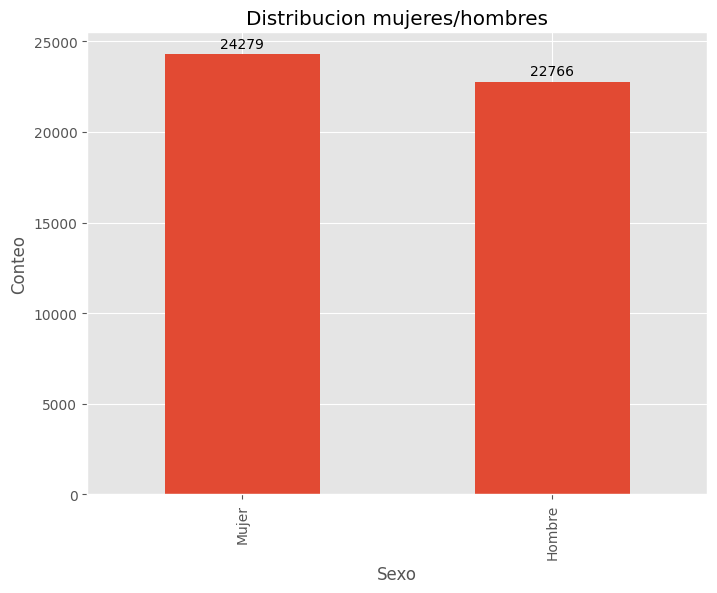

In [53]:
tsdem['df']['SEXO'].value_counts().plot(kind='bar', figsize=(8, 6))
conteo_genero = tsdem['df']['SEXO'].value_counts()
plt.xlabel("Sexo")
plt.ylabel("Conteo")
plt.title("Distribucion mujeres/hombres")
for i, v in enumerate(conteo_genero):
    plt.text(i, v + 350, str(v), ha='center')
plt.show()

### 3.2 Distribucion de edades

Text(0.5, 1.0, 'Distribucion de edades')

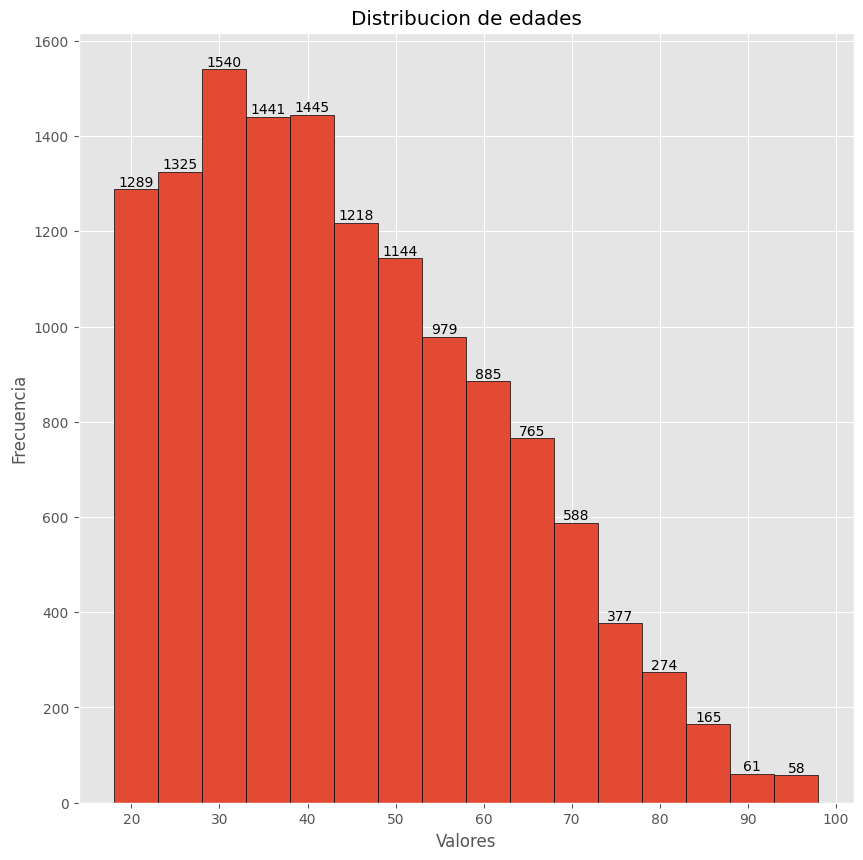

In [54]:
plt.figure(figsize=(10, 10))
hist, bins, _ = plt.hist(tmodulo['df']['EDAD'], bins=16, edgecolor='black')
# Calcular el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Etiquetar los valores en el centro de las barras
for count, x in zip(hist, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title("Distribucion de edades")

In [55]:
tmodulo['df']['EDAD_cat'].value_counts()

EDAD_cat
adulto_joven    6231
adulto          4464
adulto_mayor    2549
adolescencia     274
Name: count, dtype: int64

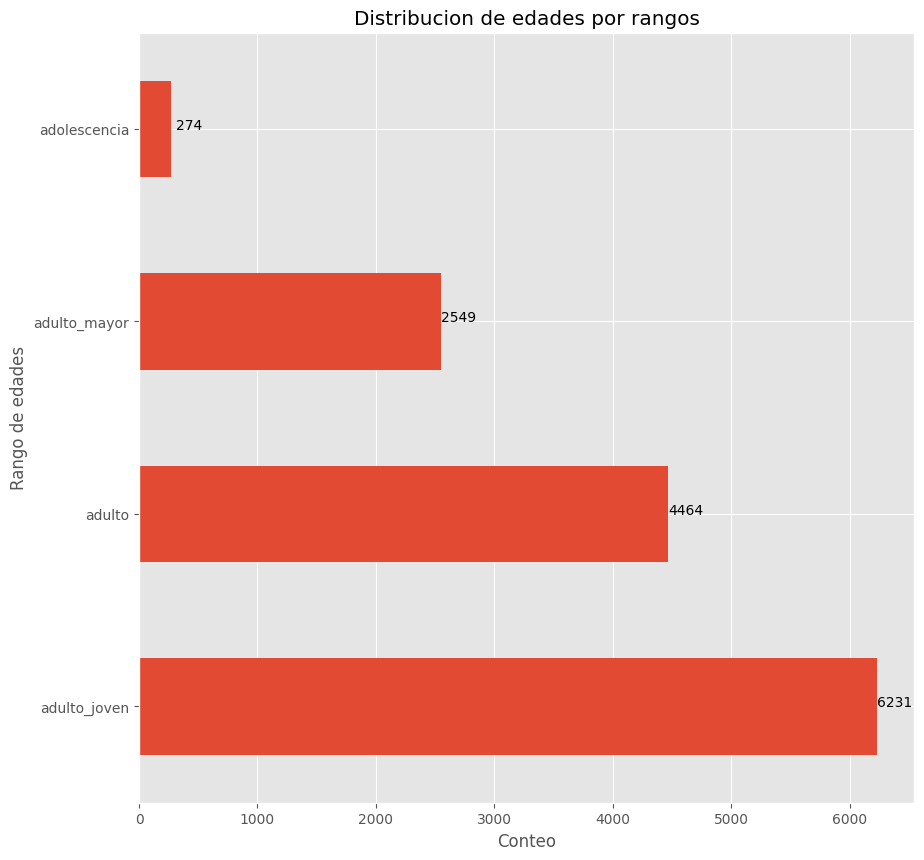

In [56]:
tmodulo['df']['EDAD_cat'].value_counts().plot(kind="barh", figsize=(10, 10))

conteo_genero = tmodulo['df']['EDAD_cat'].value_counts()
plt.ylabel("Rango de edades")
plt.xlabel("Conteo")
plt.title("Distribucion de edades por rangos")
for i, v in enumerate(conteo_genero):
    plt.text(v + 150, i, str(v), ha='center')

plt.show()

### 3.3 Distribucion de edades por sexo

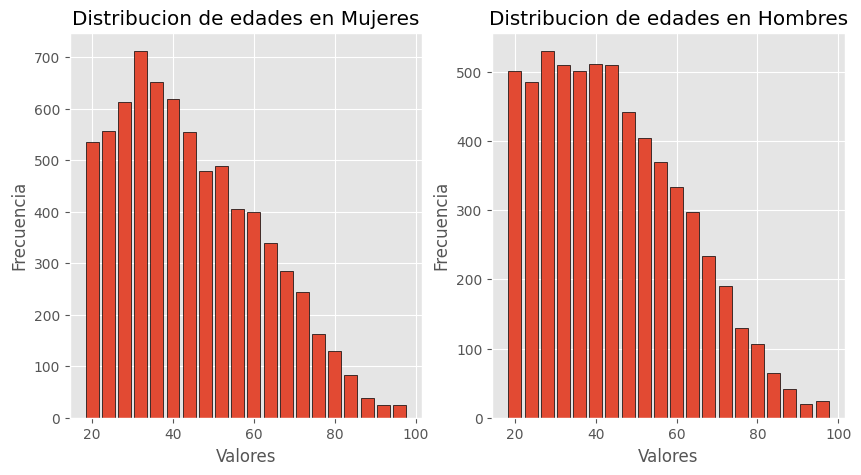

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila y 2 columnas

axs[0].hist(tmodulo['df']['EDAD'][tmodulo['df']["SEXO"] == "Mujer"], bins=20,edgecolor='black', rwidth=0.8)
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribucion de edades en Mujeres')

axs[1].hist(tmodulo['df']['EDAD'][tmodulo['df']["SEXO"] == "Hombre"], bins=20, edgecolor='black', rwidth=0.8)
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribucion de edades en Hombres')

plt.show()

### 3.4 Nivel Educativo por sexo

In [58]:
tmodulo['df']['P3_1_1'].value_counts()

P3_1_1
Secundaria                                      3571
Primaria                                        2977
Preparatoria o bachillerato                     2733
Licenciatura o ingeniería (profesional)         2709
Ninguno                                          691
Estudios técnicos con preparatoria terminada     315
Maestría o doctorado                             260
Estudios técnicos con secundaria terminada       253
Normal básica                                     35
Preescolar o kínder                               10
Name: count, dtype: int64

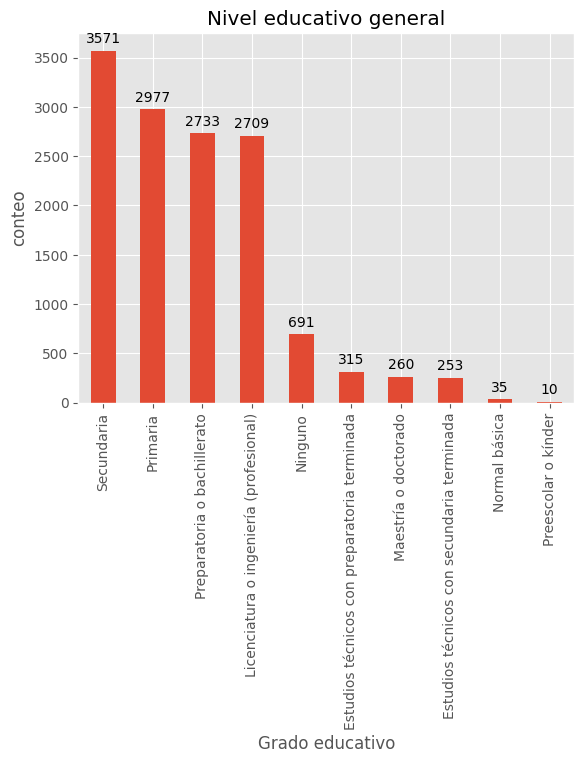

In [59]:
tmodulo['df']['P3_1_1'].value_counts().plot(kind = 'bar')
conteo_genero = tmodulo['df']['P3_1_1'].value_counts()
plt.title("Nivel educativo general")
plt.ylabel("conteo")
plt.xlabel("Grado educativo")
for i, v in enumerate(conteo_genero):
    plt.text(i, v + 80, str(v), ha='center')
plt.show()

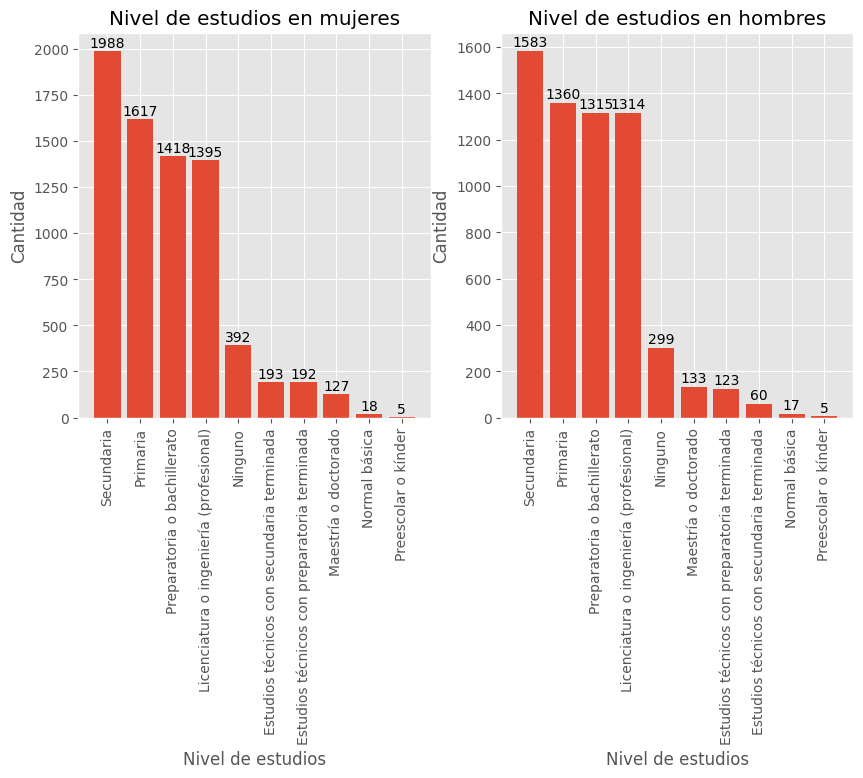

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila y 2 columnas

axs[0].bar(tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Mujer"].value_counts().index, tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Mujer"].value_counts().values)
axs[0].set_xlabel('Nivel de estudios')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Nivel de estudios en mujeres')
conteoM = tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Mujer"].value_counts()
axs[0].set_xticklabels(tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Mujer"].value_counts().index, rotation=90)
for i, v in enumerate(conteoM):
    axs[0].text(i, v + 20, str(v), ha='center')

axs[1].bar(tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Hombre"].value_counts().index, tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Hombre"].value_counts().values)
axs[1].set_xlabel('Nivel de estudios')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Nivel de estudios en hombres')
conteoH = tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Hombre"].value_counts()
for i, v in enumerate(conteoH):
    axs[1].text(i, v + 20, str(v), ha='center')
axs[1].set_xticklabels(tmodulo['df']['P3_1_1'][tmodulo['df']["SEXO"] == "Hombre"].value_counts().index, rotation=90)

plt.show()

### 3.5 Distribucion de ingresos

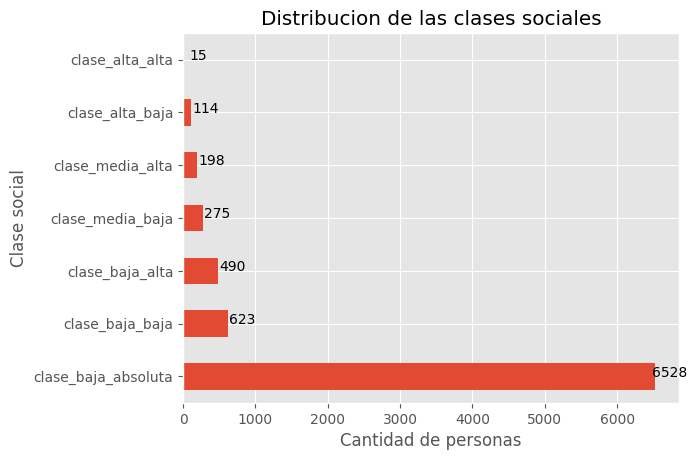

In [61]:
tmodulo["df"]["P3_8A_cat"].value_counts().plot(kind='barh')
conteoingresos = tmodulo["df"]["P3_8A_cat"].value_counts()
for i, v in enumerate(conteoingresos):
    plt.text(v + 200, i, str(v), ha='center')
plt.ylabel("Clase social")
plt.xlabel("Cantidad de personas")
plt.title("Distribucion de las clases sociales")

plt.show()

### 3.7 Ingresos segun nivel educativo

In [98]:
tmodulo["df"].groupby(['P3_1_1'])["P3_8A_cat"].value_counts()["Estudios técnicos con preparatoria terminada"][:3]




P3_8A_cat
clase_baja_absoluta    151
clase_baja_baja         27
clase_baja_alta         14
Name: count, dtype: int64

In [95]:
categories = [category for category in tmodulo["df"]["P3_1_1"].value_counts().index]



   

[3571, 2977, 2733, 2709, 691, 315, 260, 253, 35, 10]


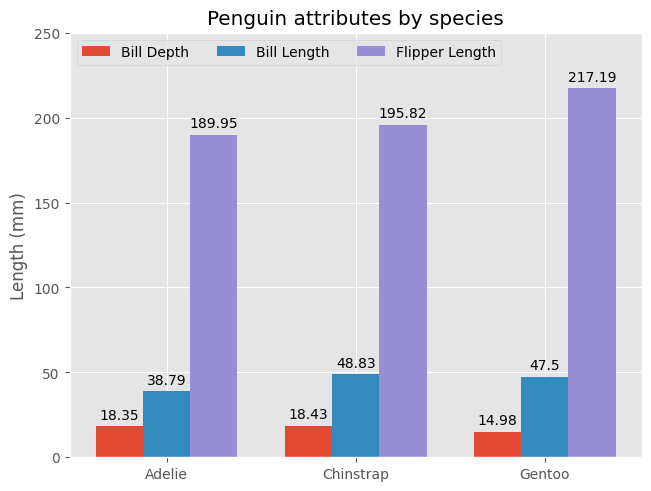

In [96]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [79]:
tmodulo["df"].groupby(['P3_1_1'])["P3_8A_cat"].value_counts()['Estudios técnicos con preparatoria terminada']


AttributeError: 'list' object has no attribute 'unique'

In [ ]:
# Sample data
categories = [category for category in tmodulo["df"]["P3_1_1"].value_counts().index]

valores = []

for category in categories:
    v = []

group1_values = [10, 15, 8]
group2_values = [12, 18, 6]

# Define the width of each bar and the positions for the groups
bar_width = 0.35
index = np.arange(len(categories))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bars for the first group
bars1 = ax.bar(index - bar_width/2, group1_values, bar_width, label='Group 1')

# Plot the bars for the second group
bars2 = ax.bar(index + bar_width/2, group2_values, bar_width, label='Group 2')

### 3.6 Razones principales por que se adquirio cuentas bancarias

In [62]:
tmodulo['df']["P5_8_01"]

0        No se declaró como opción afirmativa
1        No se declaró como opción afirmativa
2                                         NaN
3                                         NaN
4        No se declaró como opción afirmativa
                         ...                 
13549    No se declaró como opción afirmativa
13550    No se declaró como opción afirmativa
13551                                     NaN
13552                                     NaN
13553    No se declaró como opción afirmativa
Name: P5_8_01, Length: 13554, dtype: category
Categories (2, object): ['Le gusta ahorrar', 'No se declaró como opción afirmativa']